<a href="https://colab.research.google.com/github/MishaE-e/ml_fmi/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Набор данных: https://archive.ics.uci.edu/dataset/837/product+classification+and+clustering

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

2. Загрузка данных

In [ ]:
df = pd.read_csv(u'pricerunner_aggregate.csv')

In [ ]:
df

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
...,...,...,...,...,...,...,...
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59,47517,Smeg FAB28 Cream,2623,Fridges
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59,47518,Smeg FAB28 Red,2623,Fridges
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59,47519,Smeg FAB28 Pink,2623,Fridges
35309,47355,candy 60cm built under larder fridge cru160nek,125,47524,Candy CRU16.0,2623,Fridges


In [ ]:
df_new = df.drop([' Cluster Label', 'Product Title'], axis=1)

In [ ]:
df_new

,Product ID,Merchant ID,Cluster ID,Category ID,Category Label
0,1,1,1,2612,Mobile Phones
1,2,2,1,2612,Mobile Phones
2,3,3,1,2612,Mobile Phones
3,4,4,1,2612,Mobile Phones
4,5,5,1,2612,Mobile Phones
...,...,...,...,...,...
35306,47350,59,47517,2623,Fridges
35307,47351,59,47518,2623,Fridges
35308,47352,59,47519,2623,Fridges
35309,47355,125,47524,2623,Fridges


3. Краткая информация

In [ ]:
print("Краткая информация:")
df.info()
print(f"\nРазмерность: {df.shape}")
print(f"\nВсего пропусков: {df.isnull().sum().sum()}")
print(f"\nПропусков по столбцам:\n{df.isnull().sum()}")
print(f"\nКоличество дубликатов: {df.duplicated().sum()}")
print(f"\nCтатистическая информация:\n{df.describe()}")

Краткая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB

Размерность: (35311, 7)

Всего пропусков: 0

Пропусков по столбцам:
Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64

Количество дубликатов: 0

Cтатистическая информация:
         Product ID   Merchant ID    Cluster ID   Category ID
count  35311.000000  35311.000000  35311.000000  35311.000000
mean   261

In [ ]:
df_new[' Category Label'].unique()

array(['Mobile Phones', 'TVs', 'CPUs', 'Digital Cameras', 'Microwaves',
       'Dishwashers', 'Washing Machines', 'Freezers', 'Fridge Freezers',
       'Fridges'], dtype=object)

In [ ]:
df_new[' Category Label'].value_counts()

,count
Category Label,
Fridge Freezers,5501
Mobile Phones,4081
Washing Machines,4044
CPUs,3862
Fridges,3584
TVs,3564
Dishwashers,3424
Digital Cameras,2697
Microwaves,2342


4. Визуализировать данные

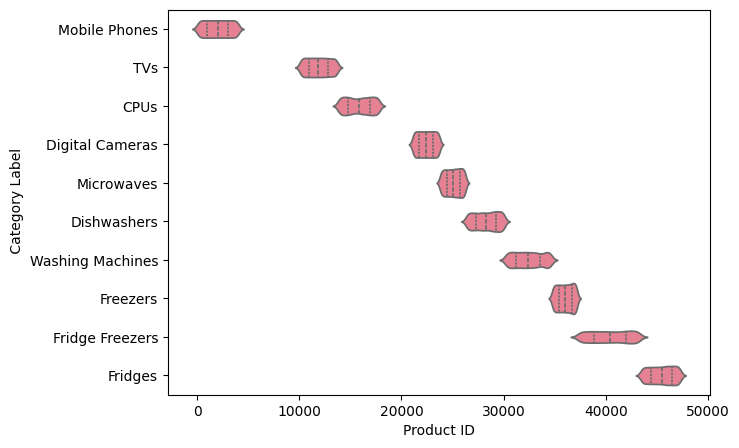

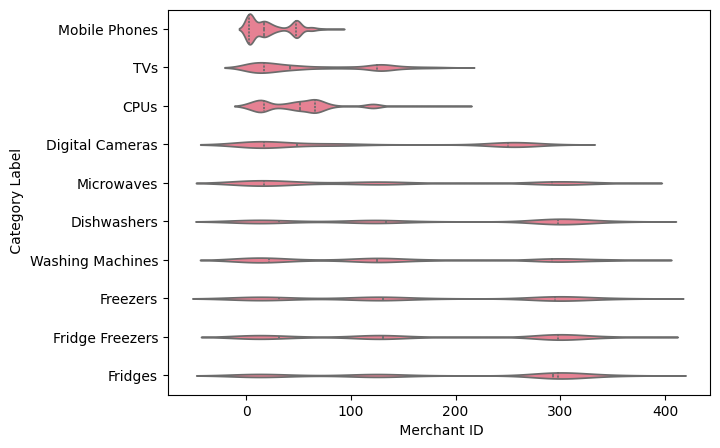

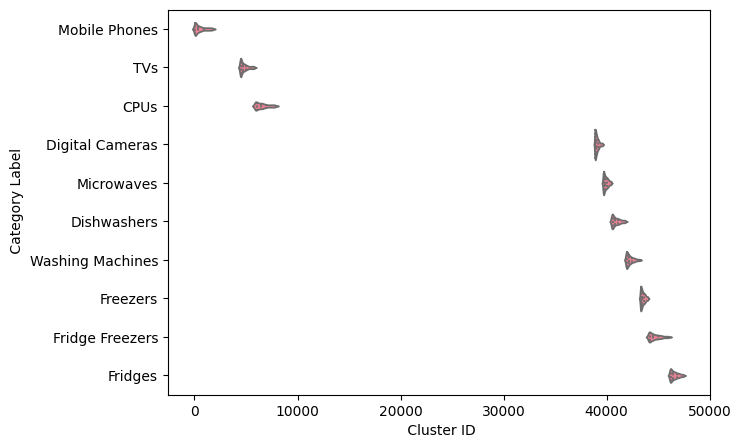

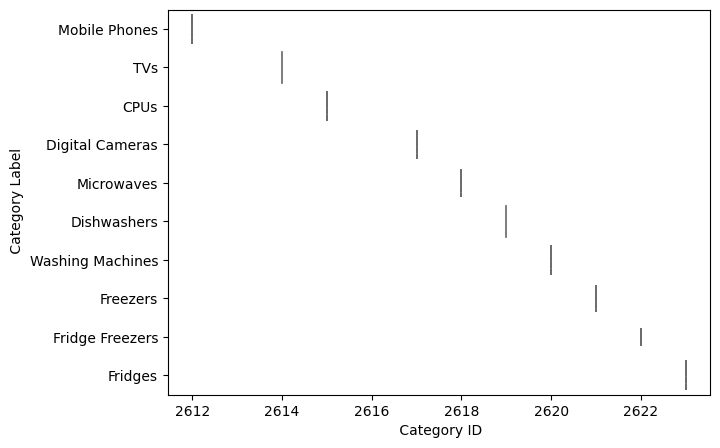

In [ ]:
plt.figure(figsize = (7, 5))
sns.violinplot(y = ' Category Label', x = 'Product ID', data = df_new, inner = 'quartile')
plt.show()

plt.figure(figsize = (7, 5))
sns.violinplot(y = ' Category Label', x = ' Merchant ID', data = df_new, inner = 'quartile')
plt.show()

plt.figure(figsize = (7, 5))
sns.violinplot(y = ' Category Label', x = ' Cluster ID', data = df_new, inner = 'quartile')
plt.show()

plt.figure(figsize = (7, 5))
sns.violinplot(y = ' Category Label', x = ' Category ID', data = df_new, inner = 'quartile')
plt.show()


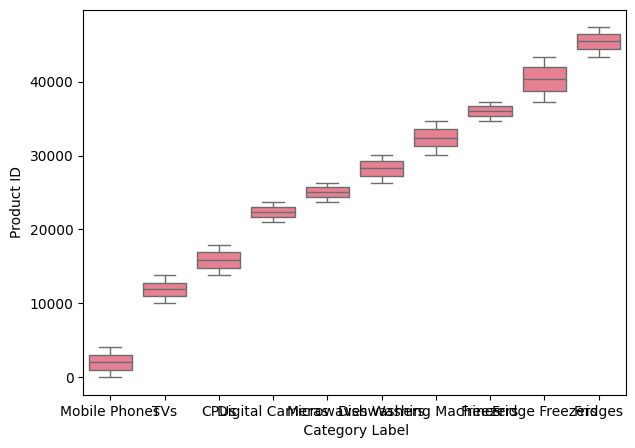

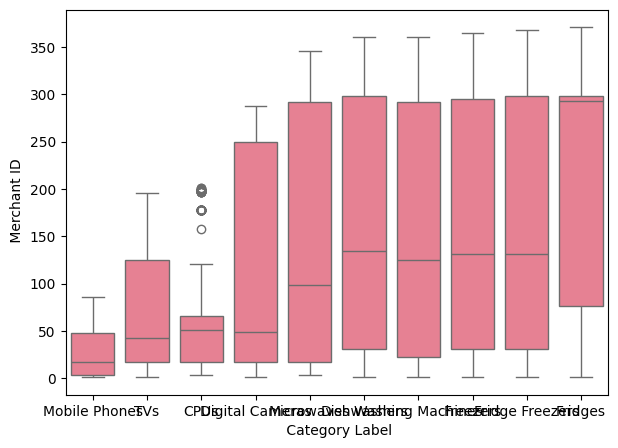

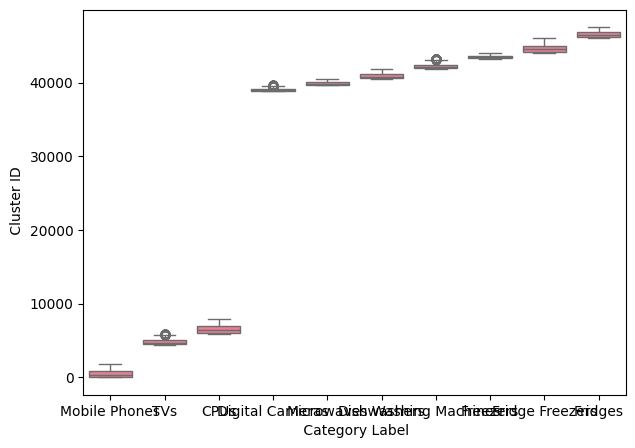

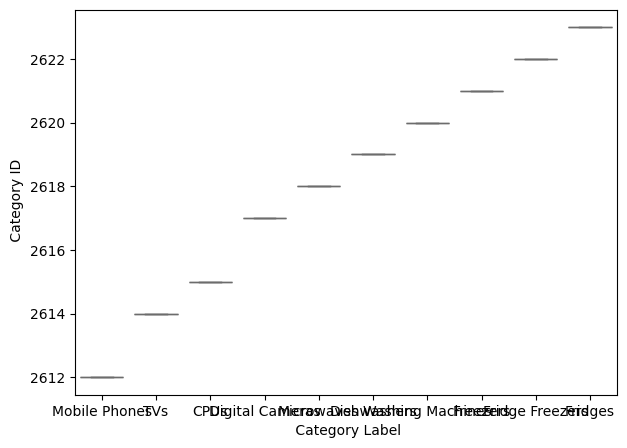

In [ ]:
plt.figure(figsize = (7, 5))
sns.boxplot(x = ' Category Label', y = 'Product ID', data = df_new)
plt.show()

plt.figure(figsize = (7, 5))
sns.boxplot(x = ' Category Label', y = ' Merchant ID', data = df_new)
plt.show()

plt.figure(figsize = (7, 5))
sns.boxplot(x = ' Category Label', y = ' Cluster ID', data = df_new)
plt.show()

plt.figure(figsize = (7, 5))
sns.boxplot(x = ' Category Label', y = ' Category ID', data = df_new)
plt.show()

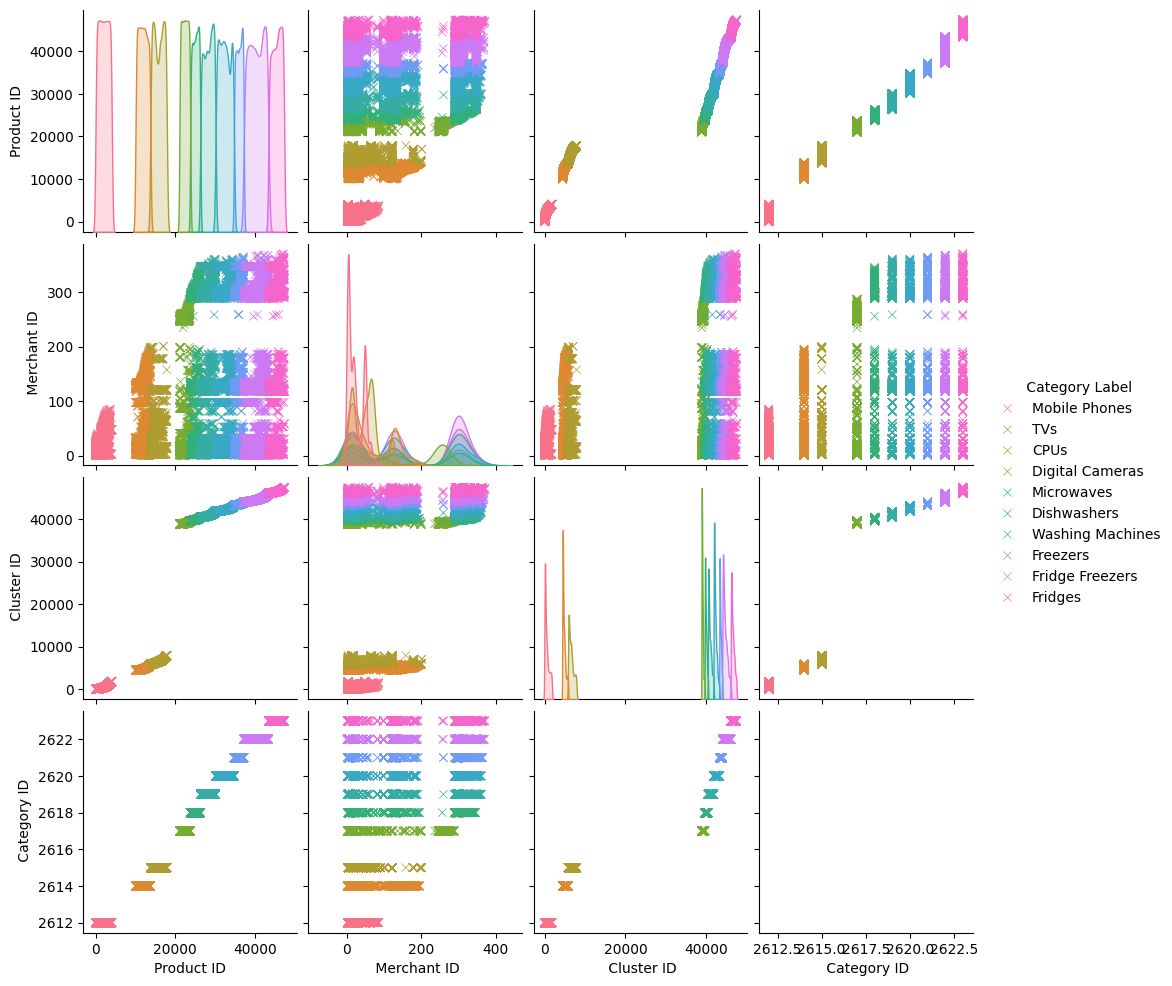

In [ ]:
sns.pairplot(df_new, hue = ' Category Label', markers = 'x')
plt.show()

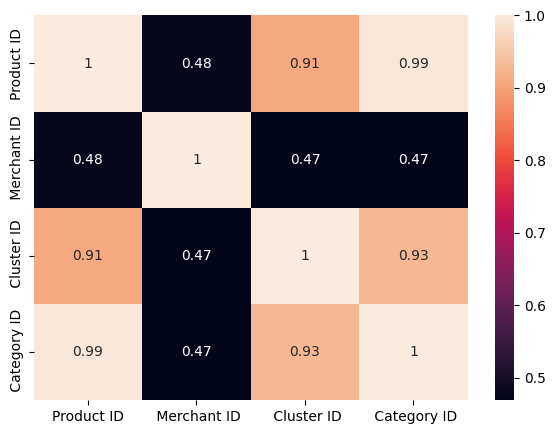

In [ ]:
plt.figure(figsize = (7,5))
sns.heatmap(df_new.corr(numeric_only = True), annot=True)
plt.show()

5. Построение модели

Y - целевая переменная, нашем случае это столбец Category Label.

В X складываем весь набор данных без целевой переменной.

In [ ]:
X = df_new.drop([' Category Label'], axis = 1)
y = df_new[' Category Label']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (35311, 4) | y shape: (35311,) 


Разделяем наш набор данных на обучающий (train) и тестовый (test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [ ]:
import scipy.stats as stats

y_mapped = y.map({'Mobile Phones': 0, 'TVs': 1, 'CPUs': 2, 'Digital Cameras': 3, 'Microwaves': 4, 'Dishwashers': 5, 'Washing Machines': 6, 'Freezers': 7, 'Fridge Freezers': 8, 'Fridges': 9})
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size = 0.30, shuffle = True)

stats.ttest_ind (a = y_train, b = y_test)

TtestResult(statistic=np.float64(-0.940713004220899), pvalue=np.float64(0.3468583885375459), df=np.float64(35309.0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size = 0.20, random_state = 15, stratify = y_mapped)

stats.ttest_ind (a = y_train, b = y_test)

TtestResult(statistic=np.float64(0.010894245563264054), pvalue=np.float64(0.991307883150047), df=np.float64(35309.0))

6. Обучение и выбор оптимальной модели

In [ ]:
models = []
#models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=50000))) #(в датасете большое количество строк, программа долго вычисляет)
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVC', SVC(gamma='auto'))) #(в датасете большое количество строк, программа долго вычисляет)

results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
  cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.939889 (0.003677)
KNN: 0.999080 (0.000553)
CART: 0.999894 (0.000162)
NB: 0.986159 (0.003498)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sk_lda = LinearDiscriminantAnalysis(solver='svd')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.9428005096984284
sk LDA prediction: [0 0 2 ... 2 6 5]
sk transformed features
[[ 6.44681660e+01  6.63746414e+01  6.32920761e+01  6.43192552e+01
   6.36459378e+01]
 [-6.80938684e+00  8.11919107e+00 -4.10775627e+00 -6.77596170e+00
  -4.58895319e-02]
 [ 1.94376189e+00 -5.79514815e-01  1.51354404e+00  1.61011477e+00
   1.47388691e+00]]


7. Визуализация

/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


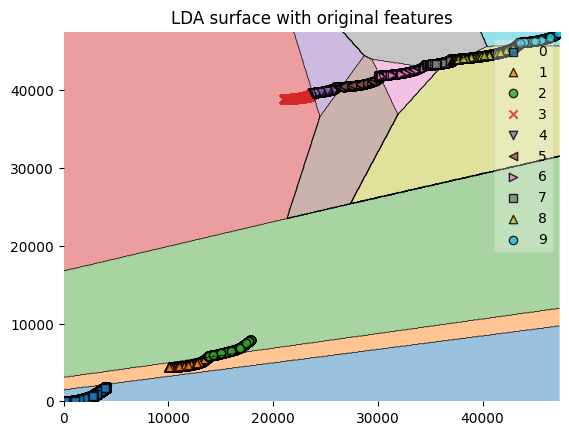

In [ ]:
from mlxtend.plotting import plot_decision_regions

#' Merchant ID',	'Product ID', ' Cluster ID', ' Category ID'
y_s = y_train
X_2d = X_train[['Product ID', ' Cluster ID']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X = X_2d,
    	y = y_2d,
    	clf = sk_lda1)
plt.show()

In [ ]:
dff = df_new[" Category Label"].map({'Mobile Phones': 0, 'TVs': 1, 'CPUs': 2, 'Digital Cameras': 3, 'Microwaves': 4, 'Dishwashers': 5, 'Washing Machines': 6, 'Freezers': 7, 'Fridge Freezers': 8, 'Fridges': 9})

Xs = df_new[[' Merchant ID',	'Product ID']]
ys = dff.values

sk_lda2 = LinearDiscriminantAnalysis(solver = 'svd')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state = 0)

sk_lda2.fit(X1_lda_train, y1_train)

LinearDiscriminantAnalysis()

In [ ]:
predicted = sk_lda2.predict(X1_lda_test)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

accuracy = metrics.accuracy_score(y1_test, predicted)
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names = [str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.94
Precision (confidence when predicting a 1): 0.95
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      0.95      0.97       905
           2       0.95      1.00      0.98       947
           3       0.97      0.98      0.98       674
           4       0.89      0.97      0.93       594
           5       0.96      0.92      0.94       852
           6       0.99      0.91      0.95      1029
           7       0.71      1.00      0.83       574
           8       1.00      0.80      0.89      1401
           9       0.89      1.00      0.94       858

    accuracy                           0.94      8828
   macro avg       0.94      0.95      0.94      8828
weighted avg       0.95      0.94      0.94      8828

